# DS - Assignment 2

This assignment includes questions about data cleaning, extraction and manipulation using Pandas. You will be using an interesting dataset, containing information about national flags. The dataset gets loaded in a dataframe when you run the first cell, and then you can proceed with the questions. 

**For specific information about the dataset, take a look here: https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.names. Answer the questions bellow, and print the results.**


*You will need an additional library for this assignment, so before starting use the following command, as you did before:*

*pip install requests*

In [1]:
import sys
print(sys.version)
# https://campus.datacamp.com/courses/pandas-foundations/data-ingestion-inspection?ex=14
# Then it hits the paywall...?
# Run the following code to import the dataset to the df (dataframe)
# Do not change this cell!
%matplotlib inline
import pandas as pd
import requests
import io

csv = requests.get('https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data').content
df = pd.read_csv(io.StringIO(csv.decode('utf-8')), header=None)

2.7.14 |Anaconda, Inc.| (default, Dec  7 2017, 11:07:58) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]


In [2]:
# Question 1: Print the total number of rows and columns of the dataset, 
# as well as the first few rows (using the specified method for that)
print "rows: %d" % len(df.index)
print "columns: %d" % len(df.columns)
print "rows: %d, columns %d" % df.shape
print df.info()
df.head(2)

rows: 194
columns: 30
rows: 194, columns 30
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 30 columns):
0     194 non-null object
1     194 non-null int64
2     194 non-null int64
3     194 non-null int64
4     194 non-null int64
5     194 non-null int64
6     194 non-null int64
7     194 non-null int64
8     194 non-null int64
9     194 non-null int64
10    194 non-null int64
11    194 non-null int64
12    194 non-null int64
13    194 non-null int64
14    194 non-null int64
15    194 non-null int64
16    194 non-null int64
17    194 non-null object
18    194 non-null int64
19    194 non-null int64
20    194 non-null int64
21    194 non-null int64
22    194 non-null int64
23    194 non-null int64
24    194 non-null int64
25    194 non-null int64
26    194 non-null int64
27    194 non-null int64
28    194 non-null object
29    194 non-null object
dtypes: int64(26), object(4)
memory usage: 45.5+ KB
None


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red


In [3]:
# Question 2: This dataset does not contain any labels. The list bellow 
# contains the labels in the correct order. Find a way to add them to the dataframe,
# and then print the first few rows again to show the labels.
labels = ['name', 'landmass', 'zone', 'area', 'population', 'language', 'religion', 'bars', 'stripes', 'colours', 'red', 
          'green', 'blue', 'gold', 'white', 'black', 'orange', 'mainhue', 'circles', 'crosses', 'saltires', 'quarters', 
          'sunstars', 'crescent', 'triangle', 'icon', 'animate', 'text', 'topleft', 'botright']
df.columns = labels
df.head(2)

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red


In [4]:
# Question 3: Check if the dataset has any NaNs, and if so, show the lines that do.
import numpy as np
print df.isnull().values.any() #there are none
df[df.isnull().any(axis=1)]

# add some nan values and they get returned
# df2 = df
# df2.iloc[::3, -1] = np.nan
# df2[df2.isnull().any(axis=1)]


False


,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright


In [5]:
# Question 4: As you can see in the link provided above, the landmass label has 6 values, that correspond to:
# 1=N.America, 2=S.America, 3=Europe, 4=Africa, 4=Asia, 6=Oceania. Replace the landmass column values, 
# with their names from the list above
int_to_name = {1: "N.America", 2: "S.America", 3: "Europe", 4: "Africa", 5: "Asia", 6: "Oceania"}
df = df.replace({'landmass': int_to_name})
df

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,Asia,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,Europe,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,Africa,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,Oceania,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,Europe,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red
5,Angola,Africa,2,1247,7,10,5,0,2,3,...,0,0,1,0,0,1,0,0,red,black
6,Anguilla,N.America,4,0,0,1,1,0,1,3,...,0,0,0,0,0,0,1,0,white,blue
7,Antigua-Barbuda,N.America,4,0,0,1,1,0,1,5,...,0,0,1,0,1,0,0,0,black,red
8,Argentina,S.America,3,2777,28,2,0,0,3,2,...,0,0,0,0,0,0,0,0,blue,blue
9,Argentine,S.America,3,2777,28,2,0,0,3,3,...,0,0,1,0,0,0,0,0,blue,blue


In [6]:
# Question 5: The area is in 'in thousands of square km'. Transform it in square km.
# allows mutability here?
df.area = df.area * 1000
df

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,Asia,1,648000,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,Europe,1,29000,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,Africa,1,2388000,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,Oceania,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,Europe,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red
5,Angola,Africa,2,1247000,7,10,5,0,2,3,...,0,0,1,0,0,1,0,0,red,black
6,Anguilla,N.America,4,0,0,1,1,0,1,3,...,0,0,0,0,0,0,1,0,white,blue
7,Antigua-Barbuda,N.America,4,0,0,1,1,0,1,5,...,0,0,1,0,1,0,0,0,black,red
8,Argentina,S.America,3,2777000,28,2,0,0,3,2,...,0,0,0,0,0,0,0,0,blue,blue
9,Argentine,S.America,3,2777000,28,2,0,0,3,3,...,0,0,1,0,0,0,0,0,blue,blue


In [7]:
# Questions 6-9: Find all the flags that:
# - have a population of more than 100 million people (inclusive)
# - have an area of less than 1000 square km
# - have NO bars and NO stripes
# - are in Oceania
df.loc[(df.population >= 100)]
df.loc[(df.area < 1000)]
df.loc[(df.bars == 0) & (df.stripes == 0)]
df.loc[(df.landmass == 'Oceania')]

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
3,American-Samoa,Oceania,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
10,Australia,Oceania,2,7690000,15,1,1,0,0,3,...,1,1,6,0,0,0,0,0,white,blue
41,Cook-Islands,Oceania,3,0,0,1,1,0,0,4,...,1,1,15,0,0,0,0,0,white,blue
57,Fiji,Oceania,2,18000,1,1,1,0,0,7,...,1,1,0,0,0,1,1,0,white,blue
61,French-Polynesia,Oceania,3,4000,0,3,0,0,3,5,...,0,0,1,0,0,1,0,0,red,red
71,Guam,Oceania,1,0,0,1,1,0,0,7,...,0,0,0,0,0,1,1,1,red,red
82,Indonesia,Oceania,2,1904000,157,10,2,0,2,2,...,0,0,0,0,0,0,0,0,red,white
94,Kiribati,Oceania,1,0,0,1,1,0,0,4,...,0,0,1,0,0,1,1,0,red,blue
109,Marianas,Oceania,1,0,0,10,1,0,0,3,...,0,0,1,0,0,1,0,0,blue,blue
113,Micronesia,Oceania,1,1000,0,10,1,0,0,2,...,0,0,4,0,0,0,0,0,blue,blue


,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,Asia,1,648000,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,Europe,1,29000,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,Africa,1,2388000,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,Oceania,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,Europe,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red
5,Angola,Africa,2,1247000,7,10,5,0,2,3,...,0,0,1,0,0,1,0,0,red,black
6,Anguilla,N.America,4,0,0,1,1,0,1,3,...,0,0,0,0,0,0,1,0,white,blue
7,Antigua-Barbuda,N.America,4,0,0,1,1,0,1,5,...,0,0,1,0,1,0,0,0,black,red
8,Argentina,S.America,3,2777000,28,2,0,0,3,2,...,0,0,0,0,0,0,0,0,blue,blue
9,Argentine,S.America,3,2777000,28,2,0,0,3,3,...,0,0,1,0,0,0,0,0,blue,blue


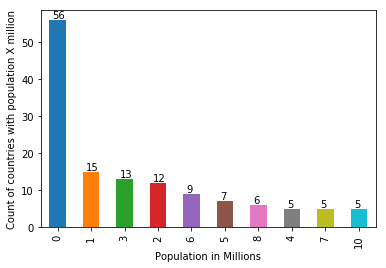

In [8]:
# Question 10: Find the population counts of the countries 
# (this means, the number of countries that had 3 million people, 10 million people, etc, using only existing values)
# and plot a bar chart of the 10 first results.
# df.iloc[0:10].population.plot(kind='bar', figsize=(15, 10), legend=True)

# print df.population.value_counts().head(10)
plt = df.population.value_counts().head(10).plot(kind='bar')
plt.set_ylabel("Count of countries with population X million")
plt.set_xlabel("Population in Millions")

for i, v in df.population.value_counts().head(10).reset_index().iterrows():
    plt.text(i - 0.15, v.population + 0.5 , v.population, color='black')

# HINT: Remember that pandas has its own simple plot() function, and that you need a bar chart.
# Also try to find the pandas function that returns the counts, do not do it by hand!
df

#### Project

Imagine we need to use this dataset for some machine learning purposes. And in the real world, 80% of the job is cleaning and transforming the data.

We need to create a way to show which color combinations are the most common. To simplify it, we will do it just in pairs, so we will only check the colors by 2 e.g red-white, red-blue, red-gold, etc. Then we will find the top 5 combinations and plot them in a bar chart.

##### General instructions:
 - Create a new dataframe keeping only the color labels.
 - Add new columns in this dataframe by combining the features by 2. DO NOT duplicate the data, e.g red-gold is the same as gold-red, so you need to check for this when creating the dataframe
 - If a combination exists in the dataframe, add 1 to the combination column.
 - Plot the top 5 combinations.
 
*Important! Do not do the pairs by hand, as in most cases you can have datasets of hundreds of features so this is not feasible. Automate the procedure of pairing, and checking if the pair exists.*


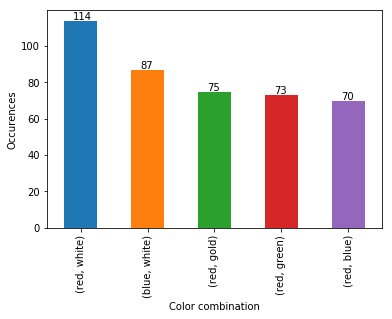

In [9]:
import itertools
colors = ['red', 'green', 'blue', 'gold', 'white', 'black', 'orange']
pairs = list(itertools.combinations(colors, 2))

# just the color columns
color_df = df[colors]

def check_pair_against_row(row, color1, color2):
    if (row[color1] == 1) & (row[color2] == 1):
        return 1
    else:
        return 0

# http://jonathansoma.com/lede/foundations/classes/pandas%20columns%20and%20functions/apply-a-function-to-every-row-in-a-pandas-dataframe/

# pandas doesn't like mutability so copy the df
copy_color_df = color_df.copy()

for pair in pairs: 
    copy_color_df[pair] = copy_color_df.apply(check_pair_against_row, args=pair, axis=1)

only_combinations = copy_color_df[pairs]
top_five_combinations = only_combinations.sum().sort_values(ascending=False).head(5)

graph = top_five_combinations.plot(kind='bar')
graph.set_ylabel("Occurences")
graph.set_xlabel("Color combination")

# add value labels
for i, v in top_five_combinations.reset_index().iterrows():
    graph.text(i - 0.1125, v[0] + 0.7, v[0], color='black')



In [10]:
my_data = {"name": ["liam", "george", "patrick", "mooch", "patty"],
           "species": ["human", "human", "human", "stooch", "human"],
           "age": [28, 27, 28, 6, 24],
           "salary": [100, 100, 100, 1000, 100]
          }

house = pd.DataFrame(my_data)
house["sex"] = ["male", "male", "male", "male", "girl"]
house = house.drop(columns="age")
house["random"] = np.nan
house

len(house.columns) # columns
len(house.index) # rows
print "rows: %d" % len(house.index)
print "columns: %d" % len(house.columns)
print "rows: %d, columns %d" % house.shape
print house.info()
house.head(2)

house["salary"].sum()
# house["salary"].plot(kind='bar')
# house["salary"].plot(kind='line')
# house["salary"].plot(kind='pie')
house.loc[house['salary'].idxmax()]
house.loc[house['salary'].idxmin()]
house["salary"].max()
house["salary"].min()
house["salary"].mean()

house.name = house.name.apply(lambda name:name.upper())
house["salary"] = house["salary"].apply(lambda x:x-10)
house

house.loc[house['species'] == "human", 'random'] = "not as cuddly"
house.sort_values('salary', ascending=False)

rows: 5
columns: 5
rows: 5, columns 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
name       5 non-null object
salary     5 non-null int64
species    5 non-null object
sex        5 non-null object
random     0 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 272.0+ bytes
None


,name,salary,species,sex,random
3,MOOCH,990,stooch,male,NaN
0,LIAM,90,human,male,not as cuddly
1,GEORGE,90,human,male,not as cuddly
2,PATRICK,90,human,male,not as cuddly
4,PATTY,90,human,girl,not as cuddly
